Border Crossing Entry Data

Task 1: Border Crossing Entry Data
Border Crossing Data provide summary statistics for inbound crossings at the U.S.-Canada and
the U.S.-Mexico border at the port level. Data are available for trucks, trains, containers, buses,
personal vehicles, passengers, and pedestrians. The data reflects the number of vehicles,
containers, passengers or pedestrians entering the United States.
This data was downloaded from the Bureau of Transportation Statistics (BTS) Border Crossing
Data. The attributes are given below:
Port Name - Port of Entry
State - State
Port code - Code of port of entry
BorderUS - Canada Border or US-Mexico Border
Date - Year, Month
Measure - Conveyances,containers,passengers,pedestrians that cross the border
Value - Incoming vehicle, container, passenger, and pedestrian Counts.
Location - Longitude and Latitude location

# SECTION A – Data Analytics with Python
Objective
Perform Exploratory Data analysis on the dataset to understand the following:
1. Plot the number of trucks that cross the US-Mexico border on a Monthly basis.
2. What is the percentage distribution for different types of vehicles that cross the borders.
3. Which month has a hike in average number of vehicles that cross the border.
4. Plot the frequency of buses and personal vehicles that cross the US-Canada border on a
daily basis.
5. Plot a state wise analysis of the vehicles that enter the US-Mexico border

**Task 1: Border Crossing Entry Data**

In [0]:
#uploading  data 
url = 'https://raw.githubusercontent.com/shivckr/border/master/Border_Crossing_Entry_Data.csv'

In [0]:
# improt package
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#Create Dataframe
entry_data = pd.read_csv(url)

In [0]:
entry_data.head(5)

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [0]:
entry_data['Month'] = entry_data['Date'].str.split(" ",n = 1, expand = True)

In [0]:
entry_data['Month'] = entry_data['Month'].str.split("/", n = 1, expand = True)

In [0]:
entry_trucks = entry_data[(entry_data['Measure'] == "Trucks")].groupby('Month').size().to_frame('Trucks').reset_index()

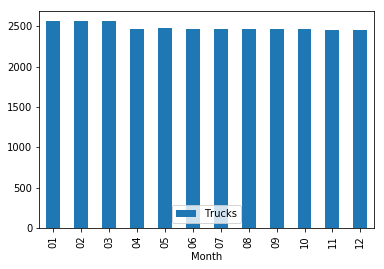

In [0]:
# 1. Plot the number of trucks that cross the US-Mexico border on a Monthly basis.
entry_trucks.plot.bar( x= 'Month', y = 'Trucks')

In [0]:
type_of_vehicle = entry_data.groupby('Measure').size().to_frame("count").reset_index()

In [0]:
type_of_vehicle

,Measure,count
0,Bus Passengers,28820
1,Buses,28822
2,Pedestrians,28697
3,Personal Vehicle Passengers,30196
4,Personal Vehicles,30219
5,Rail Containers Empty,27684
6,Rail Containers Full,27657
7,Train Passengers,27623
8,Trains,27708
9,Truck Containers Empty,29757


In [0]:
type_of_vehicle['percentage'] = (type_of_vehicle['count']/type_of_vehicle['count'].sum())*100



In [0]:
#2. What is the percentage distribution for different types of vehicles that cross the borders.
type_of_vehicle

,Measure,count,percentage
0,Bus Passengers,28820,8.311871
1,Buses,28822,8.312448
2,Pedestrians,28697,8.276397
3,Personal Vehicle Passengers,30196,8.708718
4,Personal Vehicles,30219,8.715352
5,Rail Containers Empty,27684,7.984241
6,Rail Containers Full,27657,7.976455
7,Train Passengers,27623,7.966649
8,Trains,27708,7.991163
9,Truck Containers Empty,29757,8.582108


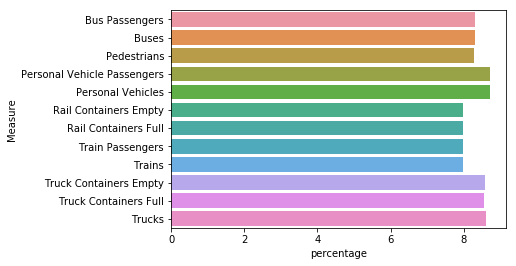

In [0]:

sns.barplot(y=type_of_vehicle['Measure'], x = type_of_vehicle['percentage'] )

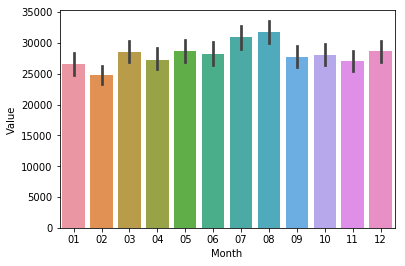

In [0]:
#3. Which month has a hike in average number of vehicles that cross the border.
sns.barplot(x = entry_data['Month'],  y = entry_data['Value'])

As per the barplot 'August' month has the highest crossover





In [0]:
# 4. Plot the frequency of buses and personal vehicles that cross the US-Canada border on a daily basis.

In [0]:
entry_data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),03
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),03
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),03
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),03
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),03


In [0]:
entry_data['Day'] = entry_data['Date'].str.split(" ",n = 1, expand = True)
entry_data['Day'] = entry_data['Day'].str.split("/", n = 1, expand = True)

In [0]:
#5. Plot a state wise analysis of the vehicles that enter the US-Mexico border

In [0]:
US_states = entry_data['State'].unique()
entry_data_US_Mexico_border =  entry_data[(entry_data['Border'] == "US-Mexico Border")].groupby('State').size().to_frame('Veh_count').reset_index()

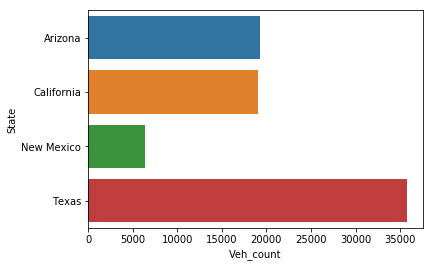

In [0]:
sns.barplot(y= entry_data_US_Mexico_border['State'],x = entry_data_US_Mexico_border['Veh_count'])

Texas state of  USA has max vehicles  enter through  US-Mexico border